#### Autori: Domenico Lembo, Antonella Poggi, Giuseppe Santucci and Marco Schaerf

[Dipartimento di Ingegneria informatica, automatica e gestionale](https://www.diag.uniroma1.it)

<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.eu.png"
     alt="License"
     style="float: left;"
     height="40" width="100" />
This notebook is distributed with license Creative Commons *CC BY-NC-SA*

## Gestione di file Excel con pandas e semplici primitive grafiche con matplotlib
1. Moduli esterni
2. pandas
3. plplot

### Moduli esterni
La comunità open source ha sviluppato negli anni una innumerevole quantità di moduli (package) esterni che permettono di estendere le funzionalità di python. L'elenco, continuamente aggiornato di questi moduli, è disponibile sul sito Web [Python Package Index](https://pypi.python.org/pypi). Il modo più semplice per installare un modulo è quello di usare il comando  `pip install nome_del_package` o  `pip3 install nome_del_package`. Una volta installato un modulo, per utilizzarlo all'interno di un programma Python occorre importarlo con il comando  `import`.

Questo notebook si concentra sul modulo pandas che permette di gestire i file Excel in formato nativo (.xlsx) e sul modulo matplotlib che permette di stampare semplici grafici.

La prima cosa da fare è installare i due moduli con i comandi: `pip3 install pandas` e `pip3 install matplotlib`. 

Per utilizzare questi moduli all'interno di un notebook eseguire all'interno di un notebook, **una volta sola***, i seguenti comandi:

%pip install openpyxl

%pip install pandas

%pip install matplotlib

In [ ]:
%pip install openpyxl
%pip install pandas
%pip install matplotlib

### Leggere un file Excel con Pandas
La funzione pandas.read_excel() legge un file excel da disco e lo carica in un oggetto di tipo **DataFrame**:

In [1]:
import pandas

df=pandas.read_excel('esami.xlsx')  #pandas.read_csv('esami.csv') si comporta in modo identico
print(type(df))
print(df)


<class 'pandas.core.frame.DataFrame'>
   Matricola  Voto     Materia
0       1345    29      Fisica
1       1987    17  Fondamenti
2       1346    27     Analisi
3       1896    30   Geometria
4       1753    30      Fisica


Pandas riconosce automaticamente la prima riga del file e i tipi contenuti nelle celle; il data frame permette una facile manipolazione dei dati:

- **df.columns**    nomi delle colonne
- **df.shape**      dimensioni della matrice (righe, colonne)
- **df.values**     accesso ai dati del file (lista di liste)
- **df.NOME**       ispezione di una colonna usando il suo nome,   *e.g., df.Materia*
- **df['NOME']**    ispezione di una colonna usando il suo nome,   *e.g., df['Materia']*

- **df.NOME.values** estrazione dei valori di una colonna con il suo nome
- **df.NOME.mean()** calcolo della media (max, min, ...) di una colonna 

Le colonne sono indicizzabili, e.g., df.Materia[0] e offrono metodi non previsti per le liste, e.g., df.Voto.mean() 

In [2]:
print('I nomi delle colonne sono:',list(df.columns),'\n')
print('numero di righe e colonne:',df.shape,'\n')
print('valori delle righe:\n',df.values,'\n') #notare che le matricole e i voti sono già convertiti in interi
print('Materie=',list(df.Materia),'\n') 
print('Materie=',list(df['Materia']),'\n') 
print('La media dei voti è=', df.Voto.mean()) 

I nomi delle colonne sono: ['Matricola', 'Voto', 'Materia'] 

numero di righe e colonne: (5, 3) 

valori delle righe:
 [[1345 29 'Fisica']
 [1987 17 'Fondamenti']
 [1346 27 'Analisi']
 [1896 30 'Geometria']
 [1753 30 'Fisica']] 

Materie= ['Fisica', 'Fondamenti', 'Analisi', 'Geometria', 'Fisica'] 

Materie= ['Fisica', 'Fondamenti', 'Analisi', 'Geometria', 'Fisica'] 

La media dei voti è= 26.6


### Stampa del contenuto di un file excel
Utilizzando df.values è possibile accedere a singoli valori df.values[i][j] o singole righe df.values[i]

In [3]:
for i in range(df.shape[0]):        #numero di righe
    for j in range(df.shape[1]):    #numero di colonne
        print(df.values[i][j], end='\t')
    print()

1345	29	Fisica	
1987	17	Fondamenti	
1346	27	Analisi	
1896	30	Geometria	
1753	30	Fisica	


### Esercizio
Scrivere una funzione che, ricevendo in ingresso il nome di un file excel, restituisca un dizionario con chiavi i nomi delle colonne e valori la lista ordinata dei valori delle colonne senza duplicazioni.

In [6]:
def excel2diz(nome_file):
    import pandas
    df=pandas.read_excel(nome_file)
    diz={}
    for nome in df.columns:                 
        diz[nome]=list(set(df[nome])) #valori della colonna nome
        diz[nome].sort()
    return diz

d=excel2diz('esami.xlsx')
print(d)

d1=excel2diz('esami1.xlsx')  #file con campi numerici vuoti
print()
print(d1)

{'Matricola': [1345, 1346, 1753, 1896, 1987], 'Voto': [17, 27, 29, 30], 'Materia': ['Analisi', 'Fisica', 'Fondamenti', 'Geometria']}

{'Matricola': [499, 1345, 1346, 1753, 1896, 1987], 'Voto': [nan, 17.0, 27.0, 29.0, 30.0], 'Materia': ['Analisi', 'Fisica', 'Fondamenti', 'Geometria']}


### Nota sui campi mancanti
Pandas assegna a eventuali campi vuoti il valore **nan**, not a number che è di tipo **float**, indipendentemente dal tipo degli altri valori della colonna. La media, min, max, o l'ordinamento di valori numerici danno il risultato corretto, l'ordinamento di stringhe e **nan** produce un errore

In [7]:
def excel2diz(nome_file):
    import pandas
    df=pandas.read_excel(nome_file)
    diz={}
    for nome in df.columns:                 
        diz[nome]=list(set(df[nome]))
        diz[nome].sort()
    return diz


d2=excel2diz('esami2.xlsx')  #file con campi non numerici vuoti: produce un errore nel sort
print(d2)

TypeError: '<' not supported between instances of 'str' and 'float'

### Controllo su campi mancanti
Il seguente codice controlla che i valori della colonna possano essere ordinati, ovvero che siano tutti dello stesso tipo

In [1]:
def excel2diz(nome_file):
    import pandas
    df=pandas.read_excel(nome_file)
    diz={}
    for nome in df.columns:                 
        diz[nome]=list(set(df[nome]))
        tipo=type(df[nome][0])        #tipo del primo elemento della colonna
        ordinabile=True
        for elem in diz[nome]:
            if type(elem)!=tipo:      #la colonna contiene tipi distinti
                ordinabile=False
                break
        if ordinabile:
            diz[nome].sort()
    return diz
d2=excel2diz('esami2.xlsx')  #file con campi non numerici vuoti: produce un errore nel sort
print(d2)

{'Matricola': [1345, 1346, 1987, 1896, 499, 500, 1753], 'Voto': [nan, 17.0, 18.0, 27.0, 29.0, 30.0], 'Materia': [nan, 'Fondamenti', 'Analisi', 'Fisica', 'Geometria']}


### Identificazione campi mancanti o errati
Più in generale, la presenza di campi mancanti o mal formati può creare problemi nell'analisi dei dati. La seguente funzione analizza un file excel e restituisce una lista di tuple (num riga, riga) delle righe corrette e una lista analoga di quelle che contengono valori **nan**. Per vedere se un float è nan è possibile usare la funzione booleana math.isnan()

In [2]:
def excel2diz3(nome_file):
    import pandas
    import math
    df=pandas.read_excel(nome_file)
    righeOK=[]
    righeNAN=[]
    for i in range(df.shape[0]):     #righe               
        for j in range(df.shape[1]): #colonne
            nanTrovato=False
            if type((df.values[i][j]))==float and  math.isnan(df.values[i][j]):
                righeNAN.append((i,list(df.values[i])))   #la riga contiene almeno un nan
                nanTrovato=True
                break
        if not nanTrovato:
            righeOK.append((i,list(df.values[i])))        
    return righeOK,righeNAN
a,b=excel2diz3('esami2.xlsx')  #file con campi non numerici vuoti: produce un errore nel sort
print(a)
print()
print(b)

[(0, [1345, 29.0, 'Fisica']), (1, [1987, 17.0, 'Fondamenti']), (2, [1346, 27.0, 'Analisi']), (3, [1896, 30.0, 'Geometria']), (4, [1753, 30.0, 'Fisica'])]

[(5, [499, nan, 'Fisica']), (6, [500, 18.0, nan])]


### Scrittura di un file excel
Per scrivere un file excel con pandas bisogna creare un DataFrame:

df = pd.DataFrame(\<lista righe\>, nomi colonne)
    
e poi chiamare la funzione
    
df.to_excel(\<nome del file excel\>, \<nome del tab\>, index=False) 

index=True aggiunge una colonna aggiuntiva con l'indice delle righe

Il seguente programma calcola i valori della funzione y=x\*\*x nell'intervallo -100,100 variando x di 0.1 e tabula la funzione sul file excel quadrato.xlsx:

In [3]:
import pandas as pd
f=[]
for i in range(-1000,1000,1):
    x=i/10
    y=x**2
    f.append([x,y])   
print('f=',f[:3],'...')

df = pd.DataFrame(f,columns=['X', 'Y'])
df.to_excel('quadrato.xlsx','y=xx',index=False)

f= [[-100.0, 10000.0], [-99.9, 9980.010000000002], [-99.8, 9960.039999999999]] ...


#### Parentesi su eval ed exec
Il programma appena mostrato non è parametrico rispetto alla funzione, ovvero calcola sempre il quadrato di x. Volendo scrivere un programma parametrico, possiamo sfruttare il fatto che, essendo python un linguaggio interpretato, è possibile esguire espressioni e comandi costruiti dinamicamente dal programmma. Si veda il seguente esempio su exec (esegue una stringa):

In [8]:
s='for i in range(5):\n\tprint(i)'
exec(s)

0
1
2
3
4



e il seguente esempio su eval (valuta il valore di una espressione contenuta in una stringa)

In [9]:
x=5
s='x*10'
eval(s)

50

#### Esercizio
Scrivere una funzione che, ricevendo una stringa **s** che contiene una espressione arbitraria in *x*, il nome di un file excel **nome**, due interi ordinati **i1 < i2** corrispondenti a un intervallo sull'asse x, e un intero **p**, corrispondente a un passo p/100, calcoli i valori della funzione y=eval(s) nell'intervallo i1,i2 variando x di p/100 e tabuli tale funzione sul file excel **nome**:

In [1]:
import pandas
def tabula(s,nome,i1,i2,p):
    f=[]
    for i in range(i1*100,i2*100,p):
        x=i/100
        y=eval(s)
        f.append([x,y])    
    df = pandas.DataFrame(f,columns=['X', 'Y'])
    df.to_excel(nome,'T1',index=False)
s='x**3+x**2+x+5'
tabula(s,'funzione.xlsx',-10,+10,10)

### Semplici visualizzazioni in Python
Alcuni moduli, invece, sono orientati alla generazione di semplici visualizzazioni, e qui vederemo il modulo matplotlib, che permette di disegnare punti e linee sul piano cartesiano o diagrammi a barre. Vediamo un semplice esempio in cui disegnamo con la funzione matplotlib.pyplot 3 punti, di coordinate (1,5), (1,7) e (2,9). 
Si procede definendo la struttura del disegno matplotlib.pyplot.plot, ovvero:

- le coordinate dei punti, tramite due liste [x1,x2,x3] [y1,y2,y3]
- il carattere da usare per il punto (tipicamente 'o','\*', o '+'), la sua dimensione e colore
- se vogliamo disegnare linee di colore blu usiamo il carattere 'b-'
- la porzione di piano su cui disegnare [xmin, xmax] e [ymin, ymax] (oppure usare il comando axis())
- etichette associate agli assi e a insiemi di punti

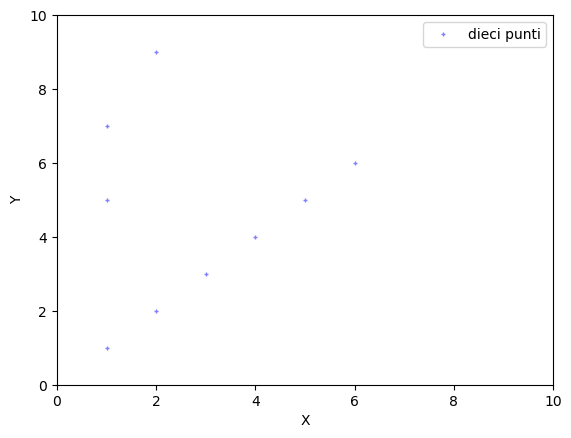

In [3]:
from matplotlib import pyplot as plt  #usiamo  la stringa plt invece di matplotlib.pyplot
#disegno di 3 punti (1,5), (1,7) e (2,9) [lista di x] [lista di y]
plt.plot([1, 1, 2,1,2,3,4,5,6],[5,7,9,1,2,3,4,5,6],
         '+', markersize=3,
         color='blue',
         alpha=0.5,
         label='dieci punti')
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim([0,10]) 
plt.ylim([0,10]) 

#plt.axis()

plt.legend()
plt.show()



E' possibile disegnare differenti diagrammi contemporaneamente definendo più plot: 

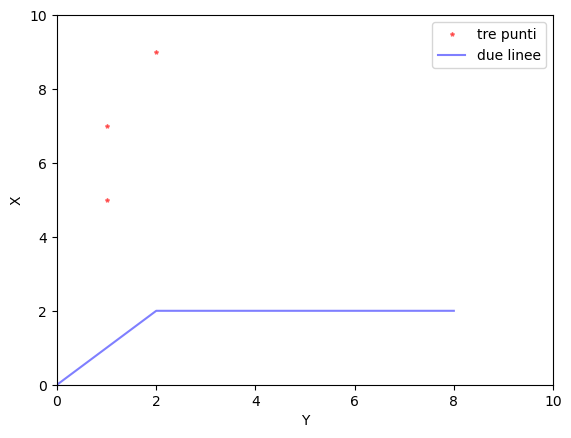

In [4]:
from matplotlib import pyplot as plt  #usiamo  la stringa plt invece di matplotlib.pyplot
#disegno di 3 punti (1,5), (1,7) e (2,9)
plt.plot([1, 1, 2],[5,7,9],
         '*', markersize=3,
         color='red',
         alpha=0.5,
         label='tre punti')
plt.plot([0, 2, 8],[0,2,2],
         'b-', markersize=2,
         alpha=0.5,
         label='due linee')
plt.xlabel('Y')
plt.ylabel('X')
plt.xlim([0,10]) 
plt.ylim([0,10]) 
plt.legend()
plt.show()



### Esercizio 
Scrivere una funzione python che riceve un data frame di Pandas con shape (n,2) che rappresenta un insieme di punti e lo plotta sullo schermo. 



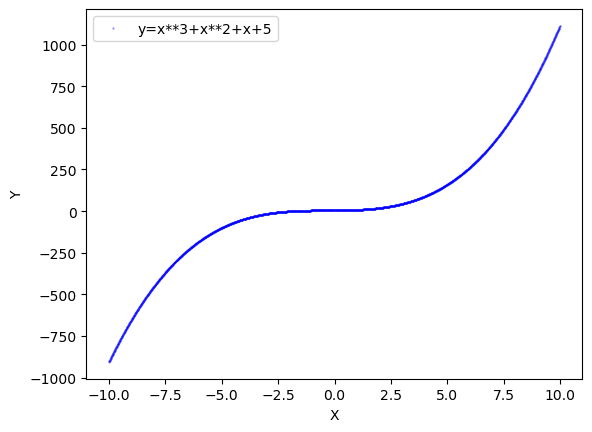

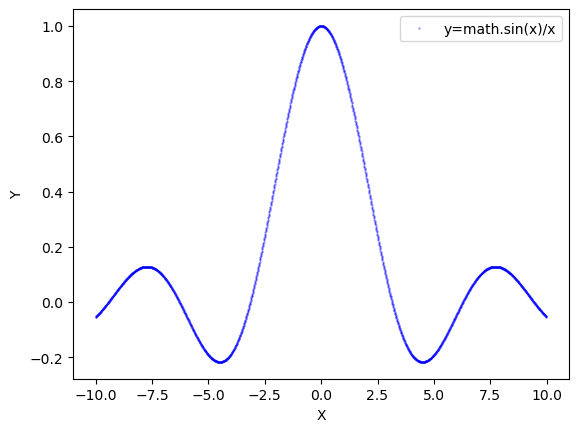

In [5]:
import pandas
from matplotlib import pyplot as plt  #usiamo  la stringa plt invece di matplotlib.pyplot
import math

def dfplot(df,etichettaPunti):
    plt.plot(df['X'], df['Y'],
         '.', markersize=1,
         color='blue',
         alpha=0.5,
         label='y='+etichettaPunti)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis()
    plt.legend()
    plt.show()
    
def crea_df(funzione,i1,i2,p):
    f=[]
    for i in range(i1*100,i2*100,p):
        x=i/100
        if x==0:
            continue #evita singolarità in x==0
        y=eval(funzione)
        f.append([x,y])    
    df = pandas.DataFrame(f,columns=['X', 'Y'])
    return df   
    
s='x**3+x**2+x+5'
df=crea_df(s,-10,+10,1)
dfplot(df,s)

s='math.sin(x)/x'
df=crea_df(s,-10,+10,1)
dfplot(df,s)


#### Istogrammi
Gli istogrammi sono un facile metodo per visualizzare la frequenza di ogni valore in una sequenza x. In generale, per ogni valore della x viene visualizzata una barra verticale di altezza uguale al numero di frequenze di quel valore. Quando i valori distinti della x sono molti può convenire raggrupparli in gruppi, chiamati *bins* in pyplot. Per disegnare istogrammi si può usare la funzione `plt.hist()`. Questa funzione ha moltissimi parametri ed utilizzi, per un dettaglio potete vedere la [documentazione](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) (in inglese). vediamo 2 esempi, uno molto semplice con pochi valori distinti della x ed uno più compesso.

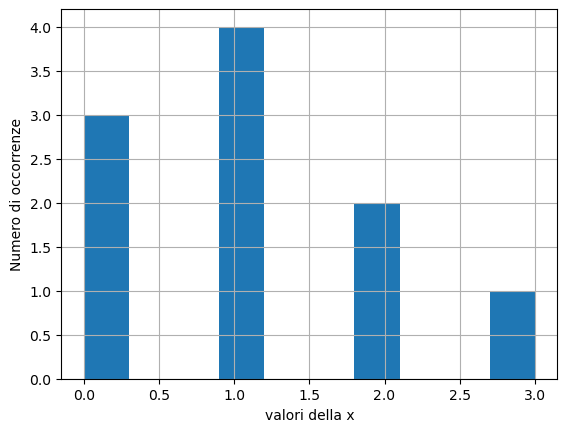

In [6]:
x = [1, 0, 0, 1, 1, 2, 3, 2, 1, 0]

plt.hist(x)

plt.xlabel('valori della x')
plt.ylabel('Numero di occorrenze')
plt.grid(True) # disegna la griglia per render più leggibile l'istogramma
plt.show()

### Esercizio
Disegnare un istogramma delle frequenze delle vocali (senza distingure tra minuscole e maiuscole) de I Malavoglia

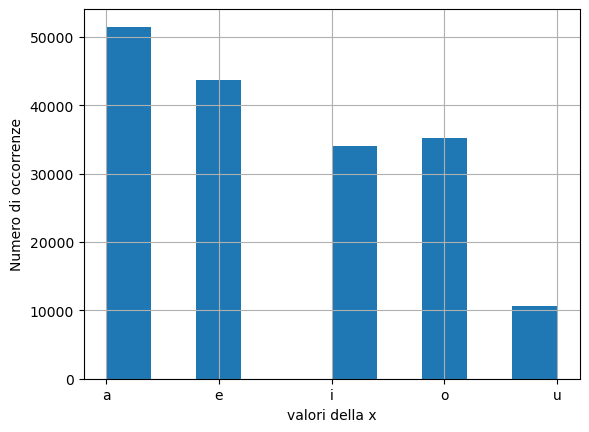

In [7]:
from matplotlib import pyplot as plt  #usiamo  la stringa plt invece di matplotlib.pyplot

s=open('I_Malavoglia.txt').read()
x=[]
for c in s:
    if c.lower() in 'aeiou':
        x.append(c.lower())
x.sort()
plt.hist(x)
plt.xlabel('valori della x')
plt.ylabel('Numero di occorrenze')
plt.grid(True) # disegna la griglia per render più leggibile l'istogramma
plt.show()